In [8]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker


In [9]:
# Load the CSV file
file_path = '../experiment_progress_vgg16.csv'
data = pd.read_csv(file_path)

In [10]:
# Set global plot style settings
plt.rcParams['axes.grid'] = False  # Disable grid for all plots
plt.rcParams['axes.facecolor'] = 'white'  # Set background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white
sns.set_style("white")  # Use Seaborn's white style to remove spines by default
sns.despine()  # Remove all spines globally

<Figure size 640x480 with 0 Axes>

# Average Latency

In [11]:
# Filter to retain only 'splinter:latency' and 'splinter:latency_exhaustive' strategies
data = data[data['strategy'].isin(['splinter:latency', 'splinter:latency_exhaustive'])]

# Replace 'splinter:latency' with '20%' and 'splinter:latency_exhaustive' with '80%'
data['strategy'] = data['strategy'].replace({'splinter:latency': '20%', 'splinter:latency_exhaustive': '80%'})


C:\Users\danie\AppData\Local\Temp\ipykernel_9440\2156634724.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


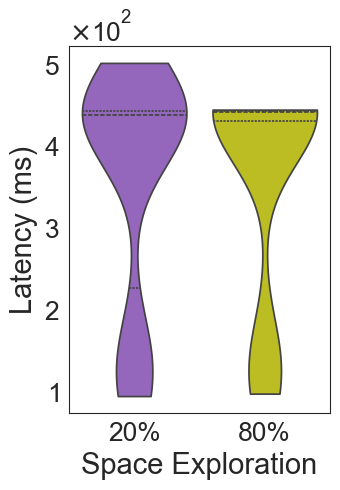

In [12]:
# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts


# Set up the figure
fig, ax = plt.subplots(figsize=(3.5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['20%', '80%']
palette_colors = ['tab:purple', 'tab:olive']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='latency',
    data=data,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Space Exploration', fontsize=label_font_size)
ax.set_ylabel('Latency (ms)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('latency_vgg16_exhaustive.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Energy

C:\Users\danie\AppData\Local\Temp\ipykernel_9440\278092891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


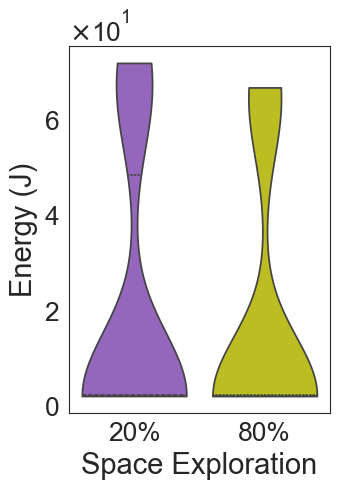

In [13]:
# Set up the figure
fig, ax = plt.subplots(figsize=(3.5, 5))


# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='energy',
    data=data,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Space Exploration', fontsize=label_font_size)
ax.set_ylabel('Energy (J)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('energy_vgg16_exhaustive.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Also alternative plot

# QoS violations

C:\Users\danie\AppData\Local\Temp\ipykernel_9440\3367919929.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
C:\Users\danie\AppData\Local\Temp\ipykernel_9440\3367919929.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(strategy_order, ha='center', fontsize=tick_font_size)


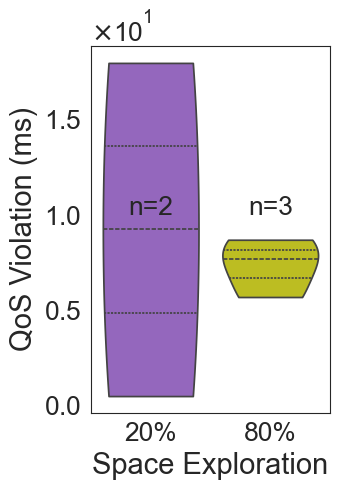

In [14]:
# Calculate violations and violation distributions
data['violation'] = data['latency'] - data['qos']
violation_data = data[data['violation'] > 0]

# Count the number of violations for each strategy
violation_counts = violation_data['strategy'].value_counts()

# Set up the figure
fig, ax = plt.subplots(figsize=(3.5, 5))

# Plot the violation distribution as a violin plot in the specified order
sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
               order=strategy_order,
               cut=0,
               density_norm='width',
               palette=palette_colors,
               saturation=1,
               #linewidth=0.5, 
               )

# Add annotation for the number of violations with adjusted positions
for i, strategy in enumerate(strategy_order):
    if strategy in violation_counts:
        count = violation_counts[strategy]
        # Define the position for the annotation based on the strategy
        position = 10

        ax.text(i, position, f'n={count}', ha='center', fontsize=tick_font_size)

# Set labels and font sizes
ax.set_xlabel('Space Exploration', fontsize=label_font_size)
ax.set_ylabel('QoS Violation (ms)', fontsize=label_font_size)
ax.set_xticklabels(strategy_order, ha='center', fontsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

# Use scientific notation for the y-axis
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axis
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and display the plot
fig.tight_layout()
plt.savefig('violation_vgg16_exhaustive.pdf', format='pdf', bbox_inches='tight')
plt.show()